In [1]:
import dill
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from jax.scipy.stats import sem

%matplotlib inline

# mpl.rcParams["font.family"] = "serif"
# mpl.rcParams["font.serif"] = "Computer Modern Roman"
# mpl.rcParams["font.usetex"] = True
# mpl.rcParams.keys()

In [2]:
from utils import approximate_divergence, make_plots

0.3_8


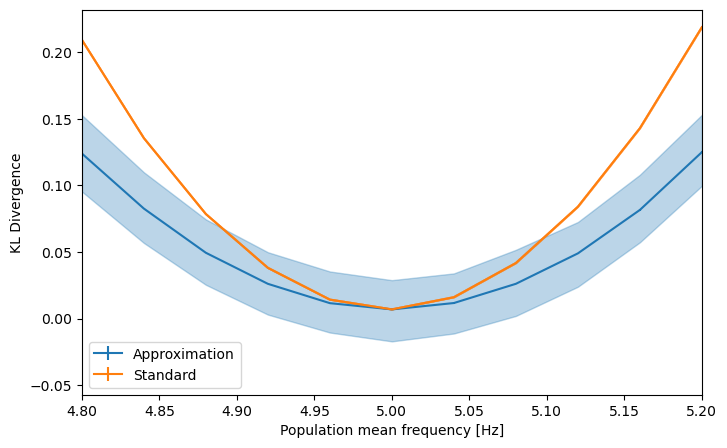

0.4_8


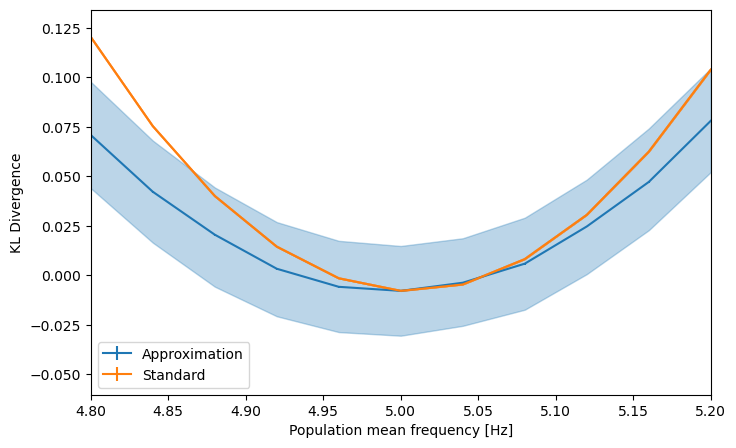

0.6_8


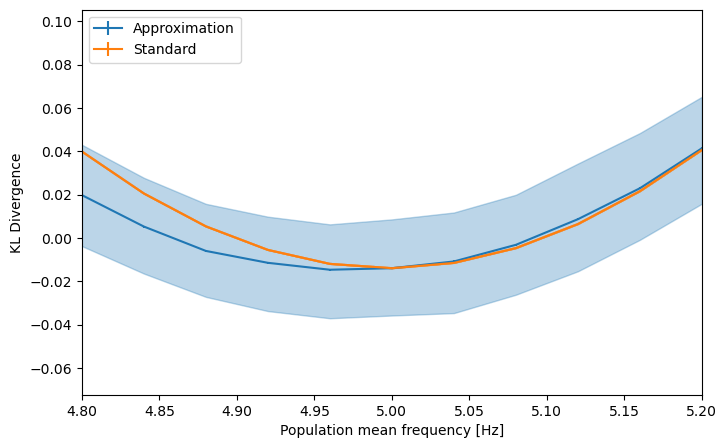

0.8_8


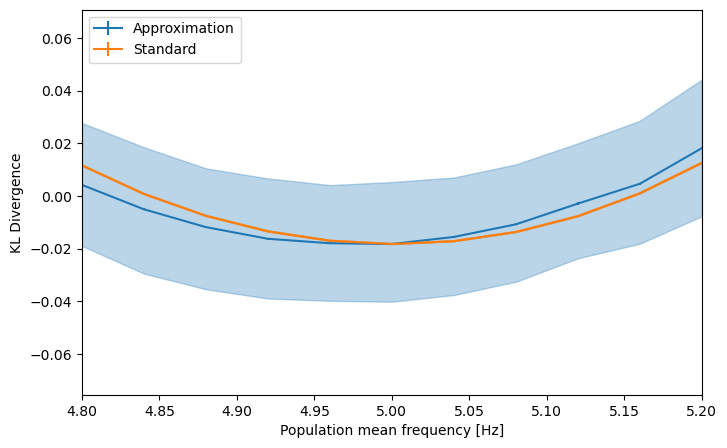

0.35_0


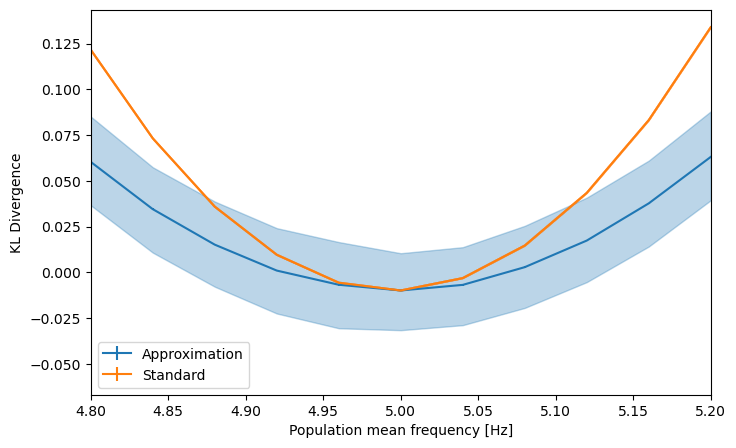

0.45_0


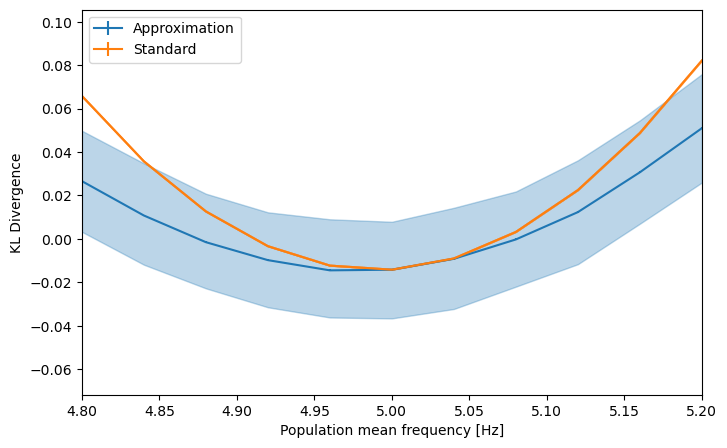

0.65_0


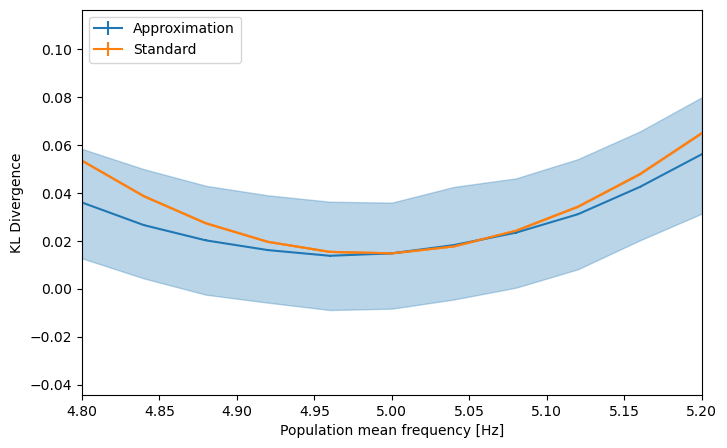

0.85_0


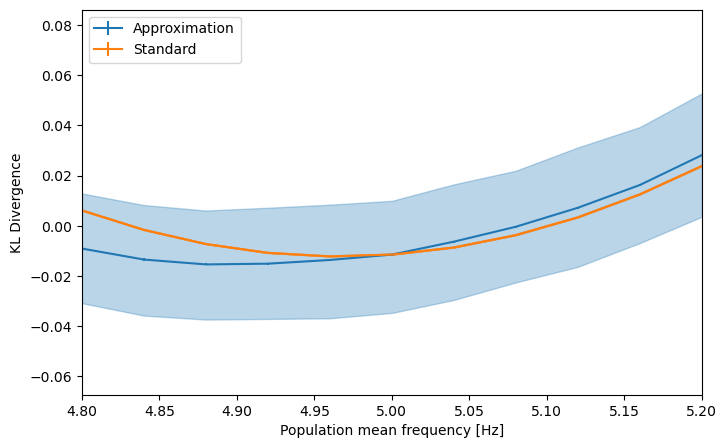

In [3]:
fpeaks = np.linspace(4.8, 5.2, 11)

with open("polyfits.pkl", "rb") as ff:
    pfits = dill.load(ff)


for sigma_pop in [0.3, 0.4, 0.6, 0.8, 0.35, 0.45, 0.65, 0.85][:]:
    if sigma_pop * 10 % 1 == 0:
        snr_threshold = 8
    else:
        snr_threshold = 0

    label = f"{sigma_pop}_{snr_threshold}"

    try:
        kl_divs = np.load(f"kl_divs_{label}.npy")[0]
        fpeak_posteriors = np.load(f"fpeak_posteriors_{label}.npy")
    except FileNotFoundError:
        continue

    print(label)

    new_divs = np.array([approximate_divergence(fpeak_posteriors.T, mean_frequency, sigma_frequency=sigma_pop) for mean_frequency in fpeaks])
    if sigma_pop in pfits:
        new_divs += np.polyval(pfits[sigma_pop], fpeaks)
    new_divs = np.repeat(new_divs, 10, axis=-1).reshape(11, 10)

    new_divs += np.mean(kl_divs[5]) - new_divs[5, 0]
    make_plots(fpeaks, kl_divs, new_divs, mode="KL")